#  ML Experiment 1
This notebook was an experiment. I wanted to see if I could have a rudimentary machine learning algorithm that decided what images had clouds and which didn't based on certain numerical values from the image. It didn't work brilliantly. It was also very rudimentary because I'm still learning how machine learning (ha?) works.

In [1]:
import os
from pathlib import Path

p = Path(os.path.abspath(os.curdir))
parent = str(p.parent)

In [6]:
import numpy as np
from scipy import ndimage
import math

directory = parent + '/Images/Original/KPNO/20170623/'
center = (256, 252)
files = os.listdir(directory)
print(len(files))
data = []

# A list of the li threshold values for each image.
f = open('li.txt', 'r')

li = []

for line in f:
    line = line[:-2]
    li.append(float(line))

names = []

print(len(li))
# A list of the training data. It gets written from this notebook.
# The theory was that if this worked I could copy this training txt
# To the main file and have the python script use it.
f2 = open('training.txt', 'w')

i = 0
for file in files:
    img = ndimage.imread(directory + file, mode='L')
    tempimg = np.copy(img)#np.array(img[center[1] - 240: center[1] + 240, center[0] - 240: center[1] + 240], copy=True)
    
    tempmean = np.mean(tempimg)
    tempstd =  np.std(tempimg)
    tempvar = np.var(tempimg)
    tempmedian = np.median(tempimg)
    
    if 28 <= i <= 97:
        cat = 'Cloud'
    else:
        cat = 'No Cloud'
    
    templi = li[i]
    names.append(file)
    dic = {'Median' : tempmedian, 'Mean' : tempmean, 'Var' : tempvar,
                 'StDev' : tempstd, 'Li' : templi, 'Category' : cat}
    data.append(dic)
    
    f2.write(str(dic) + '\n')
    
    i += 1

126
127


/Users/dylan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


In [7]:
import pandas as pd

clouds = pd.DataFrame(data)
print(clouds)

     Category          Li        Mean  Median       StDev           Var
0    No Cloud   32.830295   57.031330    67.0   49.838201   2483.846297
1    No Cloud   33.548007  128.754944   132.0  117.605285  13831.003012
2    No Cloud   37.024205   67.714912    83.0   56.169996   3155.068498
3    No Cloud   39.130435   58.354305    67.0   50.848156   2585.534941
4    No Cloud   41.580843   64.470200    67.0   55.305986   3058.752080
5    No Cloud   44.832348   41.612968    31.0   44.412353   1972.457079
6    No Cloud   62.699801   43.079685    32.0   45.247167   2047.306162
7    No Cloud   66.376272   62.169853    67.0   54.079189   2924.558682
8    No Cloud   71.391356   48.596912    52.0   45.291463   2051.316597
9    No Cloud   74.745004  123.214062   108.0  110.948471  12309.563297
10   No Cloud   75.258669   46.725807    40.0   45.958470   2112.181006
11   No Cloud   72.400619   46.362442    51.0   42.518697   1807.839575
12   No Cloud   68.103225   46.059624    52.0   42.877066   1838

/Users/dylan/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


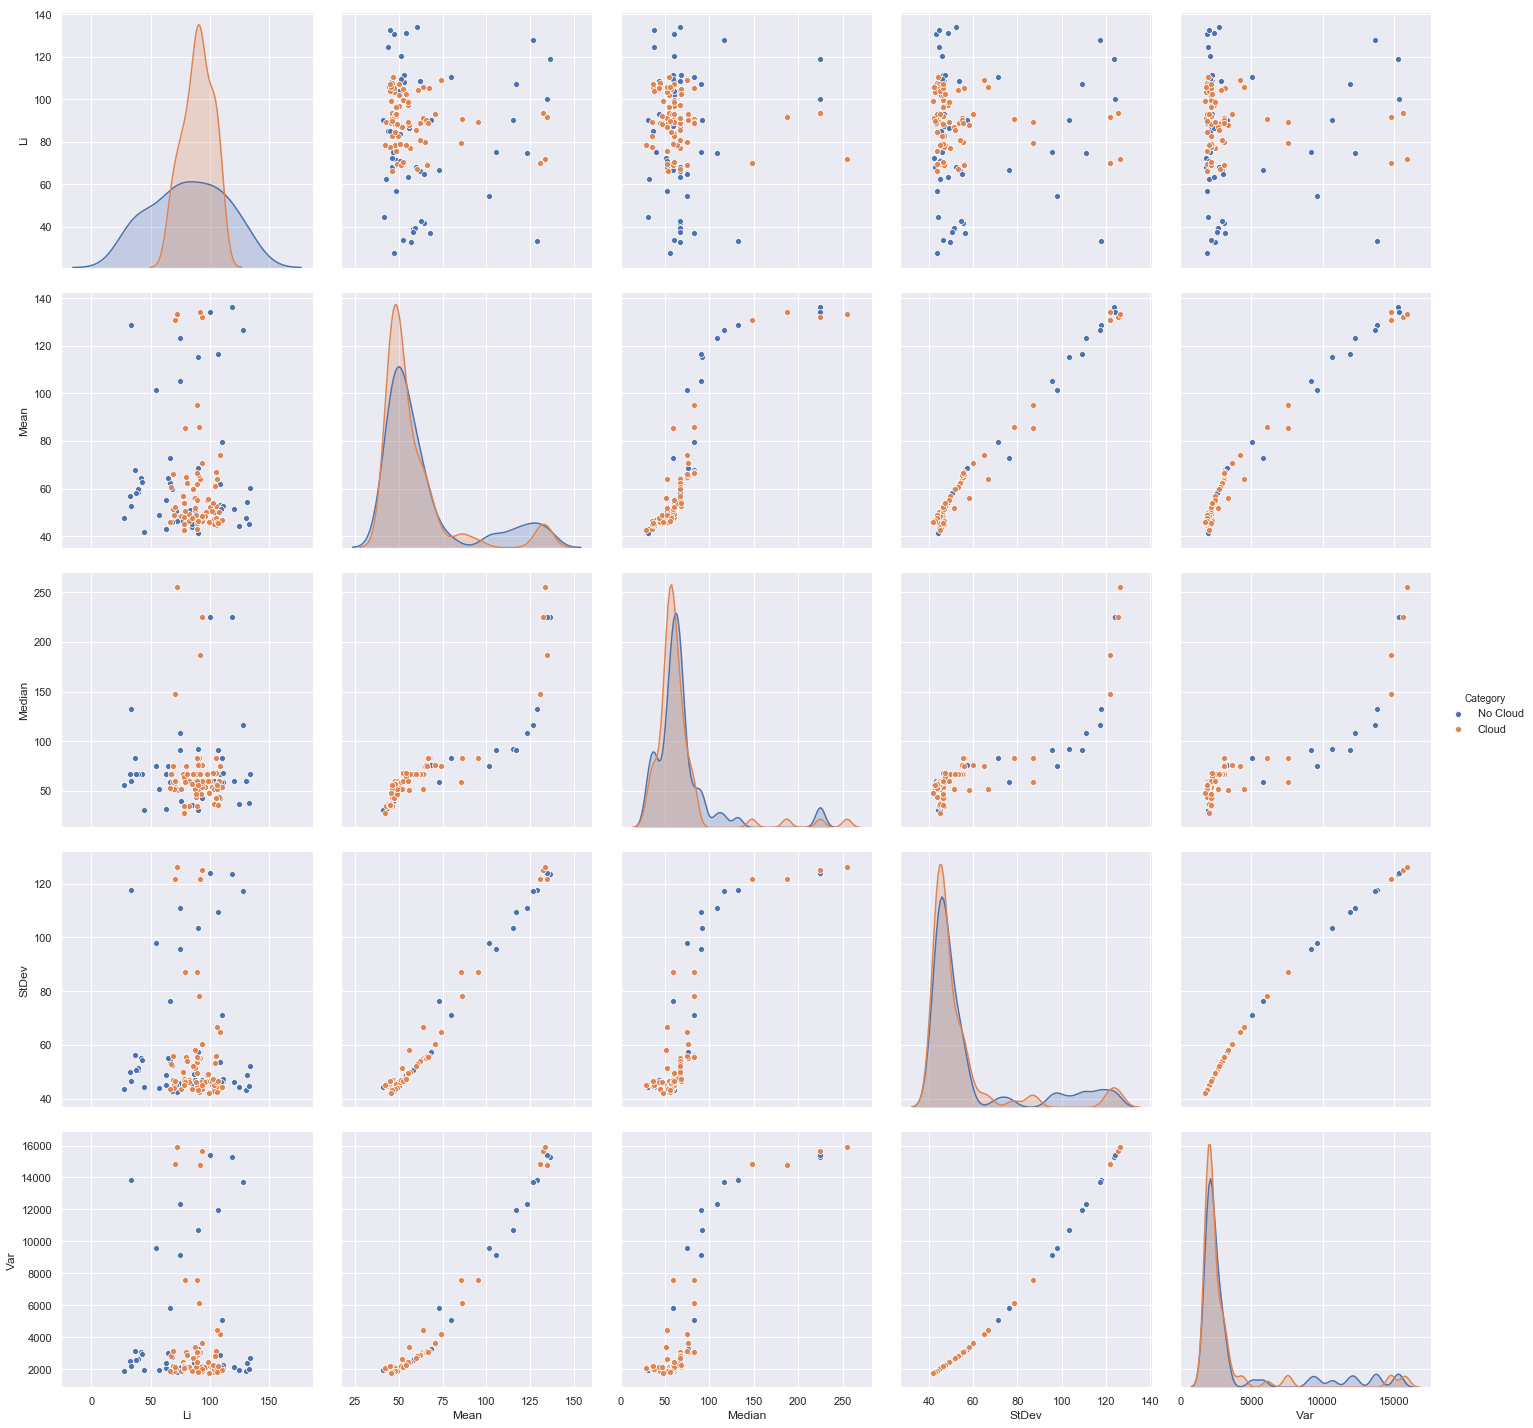

In [8]:
%matplotlib inline
import seaborn as sns; sns.set()
plot = sns.pairplot(clouds, hue='Category', size=4)
plot.savefig('pairs.png')

Much of this code is taken from the Python Data Science Handbook: https://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb

In [9]:
X = clouds.drop('Category', axis=1)
y = clouds['Category']

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

What I'm trying to do here is create a rudimentary model using the pixel values of the images to determine if there's clouds or no clouds in the images. The values based on the pixel values I use are the Li threshold value, the mean, median, st.dev and variance. Using both the st.dev and variance is a bit redundant since variance is st.dev squared, but alas.

In [11]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.71875

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
scores.mean()

0.7

In [14]:
print(Xtest)

             Li        Mean  Median       StDev           Var
86    66.149145   45.977303    53.0   43.606422   1901.520016
3     39.130435   58.354305    67.0   50.848156   2585.534941
71    76.931808   56.720757    67.0   49.788625   2478.907214
27    93.288464   47.298328    43.0   47.095478   2217.984025
58    93.462526   46.493675    54.0   44.213409   1954.825529
120   54.342001  101.435101    75.0   98.014091   9606.762001
110  127.869171  126.564411   116.0  117.114545  13715.816621
70    78.463929   48.033302    60.0   44.907689   2016.700528
28    90.673899   86.016991    83.0   78.309539   6132.383951
111  131.009789   54.474873    60.0   48.707125   2372.384043
61    93.633769  132.241676   225.0  125.160450  15665.138339
46   107.273575   50.295948    60.0   44.829868   2009.717053
65    89.183866   95.130249    83.0   87.097770   7586.021480
29    92.129153   48.536724    59.0   44.381690   1969.734415
20    84.905865   44.929165    36.0   45.646643   2083.615981
36    91